## Analysing Second Hand Car Sales Data with Supervised and Unsupervised Learning Models

#### Import all necessary libraries

In [1]:
# import all libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Artificial Neural Network
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

# Kmeans libraries
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score

# DBSCAN
from sklearn.cluster import DBSCAN

#Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering

#### Preparing the Data 

In [2]:
# read csv file
df = pd.read_csv('car_sales_data.csv')
#df

In [3]:
# check to find columns with null value
df.isnull().any()

Manufacturer           False
Model                  False
Engine size            False
Fuel type              False
Year of manufacture    False
Mileage                False
Price                  False
dtype: bool

In [4]:
df.head(5)

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


In [5]:
df.describe()

,Engine size,Year of manufacture,Mileage,Price
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.773058,2004.209440,112497.320700,13828.903160
std,0.734108,9.645965,71632.515602,16416.681336
min,1.000000,1984.000000,630.000000,76.000000
25%,1.400000,1996.000000,54352.250000,3060.750000
50%,1.600000,2004.000000,100987.500000,7971.500000
75%,2.000000,2012.000000,158601.000000,19026.500000
max,5.000000,2022.000000,453537.000000,168081.000000


# Task a

#### Engine size vs. Price

In [6]:
x = df['Engine size']
y = df['Price']

x = x.to_numpy().reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
#print(x_train)

scale = StandardScaler() #create an instance of the StandardScaler class
scale.fit(x_train) #fit the instance to the x_train to avoid data leakage

x_train_scale = scale.transform(x_train)
x_test_scale = scale.transform(x_test)

df_Linear = LinearRegression() #create an instance
df_Linear.fit(x_train_scale, y_train) # fits the instance

gradient = df_Linear.coef_[0]
intercept = df_Linear.intercept_

print(f"The gradient = {gradient:.2f}")
print(f"The intercept = {intercept:.2f}")

price_pred = df_Linear.predict(x_test_scale)

# evaluating the model
mae = mean_absolute_error(y_test, price_pred)
mse = mean_squared_error(y_test, price_pred, squared=False)
#rmse = np.sqrt(mse)
R2 = r2_score(y_test, price_pred)
print(f"mae = {mae:.2f}")
print(f"mse = {mse:.2f}")
print(f"R2 = {R2:.2f}")

The gradient = 6575.66
The intercept = 13854.63
mae = 10817.49
mse = 15182.20
R2 = 0.15


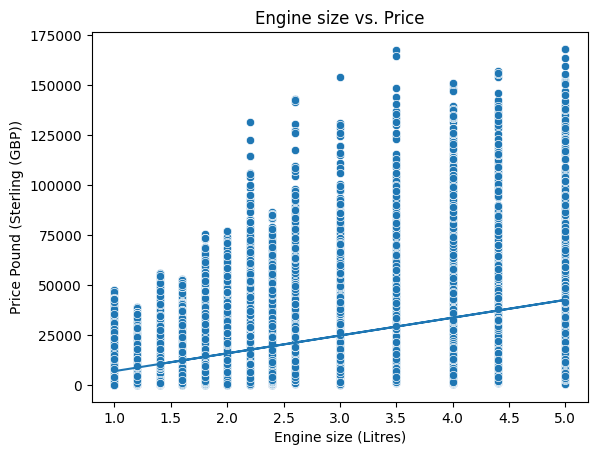

In [7]:
x_fit = df[['Engine size']]
x_fit_scaled = scale.transform(x_fit)
y_fit = df_Linear.predict(x_fit_scaled)

plt_engine_size = sns.scatterplot(data = df, x = "Engine size", y = "Price")
plt_engine_size.set(xlabel='Engine size (Litres)', ylabel='Price Pound (Sterling (GBP))')
plt_engine_size.set(title='Engine size vs. Price')

plt.plot(x_fit, y_fit)

# this model is not predicting all points 
# the value of price for engine size 2.5,3,3.5,4,4.5,5 are very far from the line

#### Polynomial Regression model

In [8]:
x = df['Engine size']
y = df['Price']

x = x.to_numpy().reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

scale = StandardScaler() #create an instance of the StandardScaler class
scale.fit(x_train) #fit the instance to the x_train to avoid data leakage

x_train_scale = scale.transform(x_train)
x_test_scale = scale.transform(x_test)

poly = PolynomialFeatures(degree = 2, include_bias = False)

x_poly_train = poly.fit_transform(x_train_scale)
x_poly_test = poly.fit_transform(x_test_scale)

df_poly = LinearRegression()
df_poly.fit(x_poly_train, y_train)

print(f"The coefficients = {df_poly.coef_}")
print(f"The intercept = {df_poly.intercept_ :.2f}")

year_pred = df_poly.predict(x_poly_test)

# evaluating the model
mae = mean_absolute_error(y_test, year_pred)
mse = mean_squared_error(y_test, year_pred, squared=False)
#rmse = np.sqrt(mse)
R2 = r2_score(y_test, year_pred)
print(f"mae = {mae:.2f}")
print(f"mse = {mse:.2f}")
print(f"R2 = {R2:.2f}")

The coefficients = [6079.69940101  238.69551851]
The intercept = 13615.93
mae = 10807.26
mse = 15176.50
R2 = 0.15


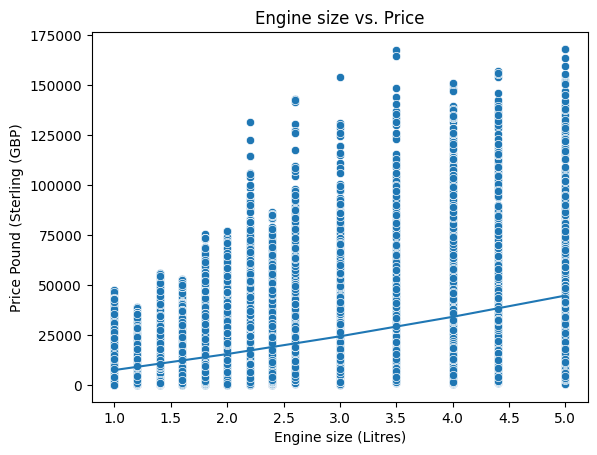

In [9]:
#x_fit = df[['Engine size']]
x_fit = np.arange(1, 6, 1).reshape(-1, 1)
x_fit_scaled = scale.transform(x_fit)
x_fit_poly = poly.fit_transform(x_fit_scaled)
y_fit = df_poly.predict(x_fit_poly)

plt_engine_size_poly = sns.scatterplot(data = df, x = "Engine size", y = "Price")
plt.plot(x_fit, y_fit)
# Label both axes
plt.xlabel("Engine size (Litres)")
plt.ylabel("Price Pound (Sterling (GBP)")
plt_engine_size_poly.set(title='Engine size vs. Price')
# Show the plot
plt.show()

#### Year of manufacture vs. Price

In [10]:
x = df['Year of manufacture']
y = df['Price']

x = x.to_numpy().reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scale = StandardScaler() #create an instance of the StandardScaler class
scale.fit(x_train) #fit the instance to the x_train to avoid data leakage

x_train_scale = scale.transform(x_train)
x_test_scale = scale.transform(x_test)

df_Linear = LinearRegression() #create an instance
df_Linear.fit(x_train_scale, y_train) # fits the instance

gradient = df_Linear.coef_[0]
intercept = df_Linear.intercept_
print(f"The gradient = {gradient:.2f}")
print(f"The intercept = {intercept:.2f}")

# predict y
year_pred = df_Linear.predict(x_test_scale)

# evaluating the model
mae = mean_absolute_error(y_test, year_pred)
mse = mean_squared_error(y_test, year_pred, squared=False)
#rmse = np.sqrt(mse)
R2 = r2_score(y_test, year_pred)
print(f"mae = {mae:.2f}")
print(f"mse = {mse:.2f}")
print(f"R2 = {R2:.2f}")

The gradient = 11711.62
The intercept = 13854.63
mae = 7031.04
mse = 11518.64
R2 = 0.51


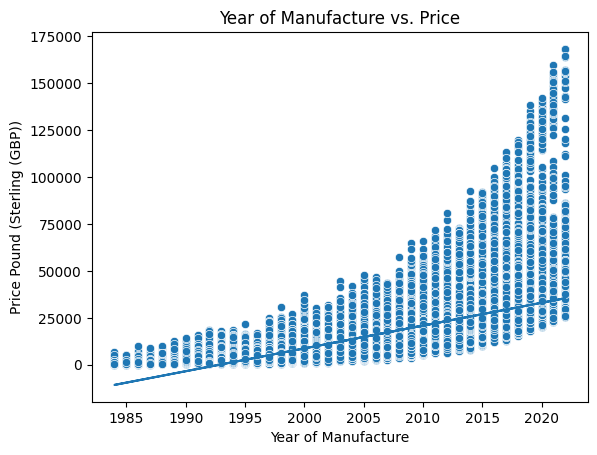

In [11]:
x_fit = df[['Year of manufacture']]
x_fit_scaled = scale.transform(x_fit)
y_fit = df_Linear.predict(x_fit_scaled)

plt_manufacture_year = sns.scatterplot(data = df, x = "Year of manufacture", y = "Price")
plt_manufacture_year.set(xlabel='Year of Manufacture', ylabel='Price Pound (Sterling (GBP))')
plt_manufacture_year.set(title='Year of Manufacture vs. Price')

plt.plot(x_fit, y_fit)

#### Polynomial Regression model

In [12]:
x = df['Year of manufacture']
y = df['Price']

x = x.to_numpy().reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

scale = StandardScaler() #create an instance of the StandardScaler class
scale.fit(x_train) #fit the instance to the x_train to avoid data leakage

x_train_scale = scale.transform(x_train)
x_test_scale = scale.transform(x_test)

poly = PolynomialFeatures(degree = 2, include_bias = False)

x_poly_train = poly.fit_transform(x_train_scale)
x_poly_test = poly.fit_transform(x_test_scale)

df_poly = LinearRegression()
df_poly.fit(x_poly_train, y_train)

print(f"The coefficients = {df_poly.coef_}")
print(f"The intercept = {df_poly.intercept_ :.2f}")

year_pred = df_poly.predict(x_poly_test)

# evaluating the model
mae = mean_absolute_error(y_test, year_pred)
mse = mean_squared_error(y_test, year_pred, squared=False)
#rmse = np.sqrt(mse)
R2 = r2_score(y_test, year_pred)
print(f"mae = {mae:.2f}")
print(f"mse = {mse:.2f}")
print(f"R2 = {R2:.2f}")

The coefficients = [12065.80671724  5281.89564916]
The intercept = 8572.73
mae = 5387.11
mse = 10295.33
R2 = 0.61


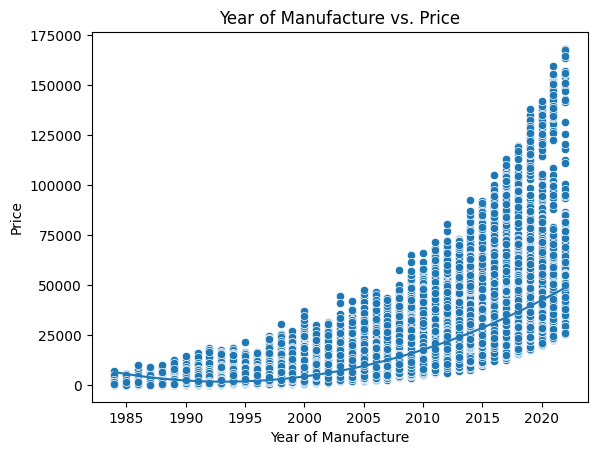

In [13]:
#x_fit = df[['Year of manufacture']]
x_fit = np.arange(1984, 2023, 1).reshape(-1, 1)
x_fit_scaled = scale.transform(x_fit)
x_fit_poly = poly.fit_transform(x_fit_scaled)
y_fit = df_poly.predict(x_fit_poly)

plt_man_poly = sns.scatterplot(data = df, x = "Year of manufacture", y = "Price")
plt.plot(x_fit, y_fit)
# Label both axes
plt.xlabel("Year of Manufacture")
plt.ylabel("Price")
plt_man_poly.set(title='Year of Manufacture vs. Price')
# Show the plot
plt.show()

#### Mileage vs. Price

In [14]:
x = df['Mileage']
y = df['Price']

x = x.to_numpy().reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scale = StandardScaler() #create an instance of the StandardScaler class
scale.fit(x_train) #fit the instance to the x_train to avoid data leakage

x_train_scale = scale.transform(x_train)
x_test_scale = scale.transform(x_test)

df_Linear = LinearRegression() #create an instance
df_Linear.fit(x_train_scale, y_train) # fits the instance

gradient = df_Linear.coef_[0]
intercept = df_Linear.intercept_
print(f"The gradient = {gradient:.2f}")
print(f"The intercept = {intercept:.2f}")

# predict y
mileage_pred = df_Linear.predict(x_test_scale)

# evaluating the model
mae = mean_absolute_error(y_test, mileage_pred)
mse = mean_squared_error(y_test, mileage_pred, squared=False)
#rmse = np.sqrt(mse)
R2 = r2_score(y_test, mileage_pred)
print(f"mae = {mae:.2f}")
print(f"mse = {mse:.2f}")
print(f"R2 = {R2:.2f}")

The gradient = -10374.08
The intercept = 13854.63
mae = 7964.78
mse = 12746.32
R2 = 0.40


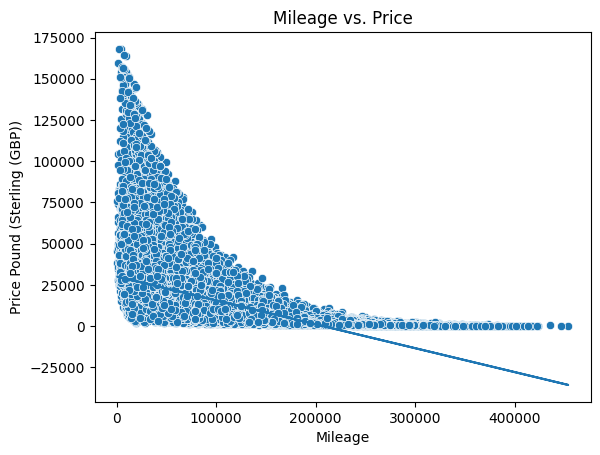

In [15]:
x_fit = df[['Mileage']]
x_fit_scaled = scale.transform(x_fit)
y_fit = df_Linear.predict(x_fit_scaled)

plt_mileage = sns.scatterplot(data = df, x = "Mileage", y = "Price")
plt_mileage.set(xlabel='Mileage', ylabel='Price Pound (Sterling (GBP))')
plt_mileage.set(title='Mileage vs. Price')

plt.plot(x_fit, y_fit)

#### Polynomial Regression model

In [16]:
x = df['Mileage']
y = df['Price']

x = x.to_numpy().reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

scale = StandardScaler() #create an instance of the StandardScaler class
scale.fit(x_train) #fit the instance to the x_train to avoid data leakage

x_train_scale = scale.transform(x_train)
x_test_scale = scale.transform(x_test)

poly = PolynomialFeatures(degree = 2, include_bias = False)

x_poly_train = poly.fit_transform(x_train_scale)
x_poly_test = poly.fit_transform(x_test_scale)

df_poly = LinearRegression()
df_poly.fit(x_poly_train, y_train)

print(f"The coefficients = {df_poly.coef_}")
print(f"The intercept = {df_poly.intercept_ :.2f}")

year_pred = df_poly.predict(x_poly_test)

# evaluating the model
mae = mean_absolute_error(y_test, year_pred)
mse = mean_squared_error(y_test, year_pred, squared=False)
#rmse = np.sqrt(mse)
R2 = r2_score(y_test, year_pred)
print(f"mae = {mae:.2f}")
print(f"mse = {mse:.2f}")
print(f"R2 = {R2:.2f}")

The coefficients = [-13630.81884183   4476.1506104 ]
The intercept = 9378.48
mae = 6409.91
mse = 11385.09
R2 = 0.52


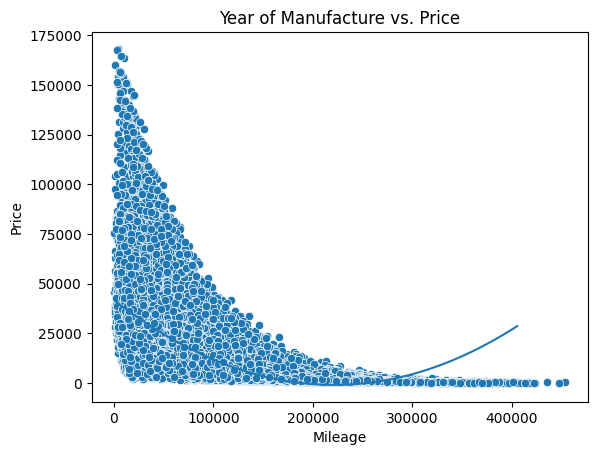

In [17]:
#x_fit = df[['Mileage']]
x_fit = np.arange(1487, 405205, 1).reshape(-1, 1)
x_fit_scaled = scale.transform(x_fit)
x_fit_poly = poly.fit_transform(x_fit_scaled)
y_fit = df_poly.predict(x_fit_poly)

plt_man_poly = sns.scatterplot(data = df, x = "Mileage", y = "Price")
plt.plot(x_fit, y_fit)
# Label both axes
plt.xlabel("Mileage")
plt.ylabel("Price")
plt_man_poly.set(title='Year of Manufacture vs. Price')
# Show the plot
plt.show()


# Task b

In [18]:
feature_names = ['Engine size', 'Year of manufacture', 'Mileage']
x = df[feature_names]
y = df['Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scale = StandardScaler()
scale.fit(x_train)

x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

df_Linear = LinearRegression()
df_Linear.fit(x_train_scaled, y_train)

gradient = df_Linear.coef_
intercept = df_Linear.intercept_
print(f"The gradient = {gradient}")
print(f"The intercept = {intercept}")

price_pred = df_Linear.predict(x_test_scaled)

# evaluating the model
mae = mean_absolute_error(y_test, price_pred)
mse = mean_squared_error(y_test, price_pred, squared=False)
#rmse = np.sqrt(mse)
R2 = r2_score(y_test, price_pred)
print(f"mae = {mae:.2f}")
print(f"mse = {mse:.2f}")
print(f"R2 = {R2:.2f}")

The gradient = [ 6594.02448017  9520.41488938 -2720.41736808]
The intercept = 13854.628699999997
mae = 6091.46
mse = 9442.38
R2 = 0.67


# Task c

In [20]:
categorical_features = ['Manufacturer', 'Model', 'Fuel type']

# Drop the target variable from the features
x = df.drop(['Price'], axis=1)
y = df['Price']

# Perform one-hot encoding using get_dummies
x_encoded = pd.get_dummies(x, columns=categorical_features, drop_first=True)

#print(x_encoded)

# Concatenate one-hot encoded features with numerical features
x_combined = pd.concat([x_encoded, x.select_dtypes(exclude=['object'])], axis=1)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_combined, y, test_size=0.2, random_state=42)

# Create an instance and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# Make predictions on the test set
price_pred = model.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, price_pred)
mse = mean_squared_error(y_test, price_pred)
R2 = r2_score(y_test, price_pred)

print(f"mae = {mae:.2f}")
print(f"mse = {mse:.2f}")
print(f"R2 = {R2:.2f}")

mae = 296.46
mse = 424883.92
R2 = 1.00


# Task d

In [21]:
categorical_features = ['Manufacturer', 'Model', 'Fuel type']

# Drop the target variable from the features
x = df.drop(['Price'], axis=1)
y = df['Price']

# Perform one-hot encoding using get_dummies
x_encoded = pd.get_dummies(x, columns=categorical_features, drop_first=True)

# Concatenate one-hot encoded features with numerical features
x_combined = pd.concat([x_encoded, x.select_dtypes(exclude=['object'])], axis=1)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_combined, y, test_size=0.2, random_state=42)

#print(x_train)

# create an instance
scale = MinMaxScaler()
# learning min & max values for scaling
scale.fit(x_train)
# apply the min- max values
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

x_train.shape

(40000, 26)

In [22]:
# building neural network model
model = Sequential()
model.add(Dense(units = 64, input_dim = (26), activation = "relu"))
model.add(Dropout(0.2))

model.add(Dense(units = 64, activation = "relu"))
model.add(Dense(units = 1, activation = "linear"))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1728      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,953
Trainable params: 5,953
Non-trainable params: 0
_________________________________________________________________


In [23]:
# compile the model

model.compile(optimizer="adam", loss='mean_squared_error', metrics='mean_squared_error')

# we want to monitor the validation loss and if no changes for 20 epochs stop 
early_stopping = EarlyStopping(monitor='val_loss', patience = 20)

# train the model
history = model.fit(x = x_train_scaled, 
                    y = y_train,
                    batch_size = None, # as we use all samples, we do not use any batch
                    epochs = 200,
                    verbose = "auto", # to showing the result while training
                    validation_split = 0.1, # use 90% of training data for training and 10% for validation
                    callbacks = [early_stopping])

Epoch 1/200
1125/1125 [==============================] - 1s 804us/step - loss: 314202560.0000 - mean_squared_error: 314202560.0000 - val_loss: 178877872.0000 - val_mean_squared_error: 178877872.0000
Epoch 2/200
1125/1125 [==============================] - 1s 718us/step - loss: 138313248.0000 - mean_squared_error: 138313248.0000 - val_loss: 84656896.0000 - val_mean_squared_error: 84656896.0000
Epoch 3/200
1125/1125 [==============================] - 1s 719us/step - loss: 70160712.0000 - mean_squared_error: 70160712.0000 - val_loss: 45504584.0000 - val_mean_squared_error: 45504584.0000
Epoch 4/200
1125/1125 [==============================] - 1s 737us/step - loss: 41790488.0000 - mean_squared_error: 41790488.0000 - val_loss: 27668720.0000 - val_mean_squared_error: 27668720.0000
Epoch 5/200
1125/1125 [==============================] - 1s 716us/step - loss: 27662970.0000 - mean_squared_error: 27662970.0000 - val_loss: 17224324.0000 - val_mean_squared_error: 17224324.0000
Epoch 6/200
1125/11

1125/1125 [==============================] - 1s 730us/step - loss: 3314261.0000 - mean_squared_error: 3314261.0000 - val_loss: 910825.7500 - val_mean_squared_error: 910825.7500
Epoch 44/200
1125/1125 [==============================] - 1s 710us/step - loss: 3260441.2500 - mean_squared_error: 3260441.2500 - val_loss: 895817.6250 - val_mean_squared_error: 895817.6250
Epoch 45/200
1125/1125 [==============================] - 1s 737us/step - loss: 3234574.7500 - mean_squared_error: 3234574.7500 - val_loss: 981842.6875 - val_mean_squared_error: 981842.6875
Epoch 46/200
1125/1125 [==============================] - 1s 725us/step - loss: 3250870.0000 - mean_squared_error: 3250870.0000 - val_loss: 966574.4375 - val_mean_squared_error: 966574.4375
Epoch 47/200
1125/1125 [==============================] - 1s 710us/step - loss: 3314709.7500 - mean_squared_error: 3314709.7500 - val_loss: 886387.3125 - val_mean_squared_error: 886387.3125
Epoch 48/200
1125/1125 [==============================] - 1s 71

313/313 [==============================] - 0s 554us/step


Text(0, 0.5, 'Predicted Price (Pound Sterling (GBP))')

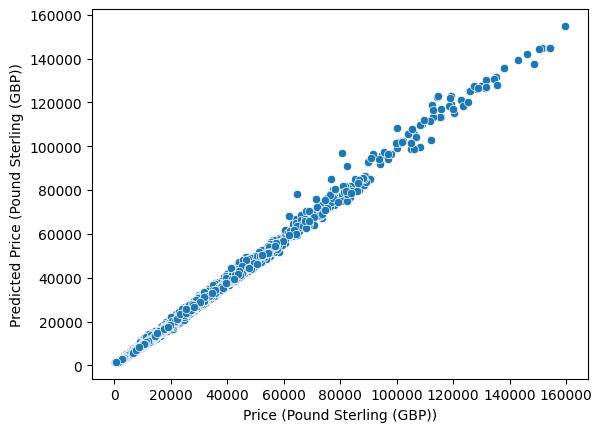

In [24]:
# predict the model
y_pred = model.predict(x_test_scaled)
y_pred = y_pred.reshape(len(y_pred),) # to convert it to 1D and plot

sns.scatterplot(x = y_test, y = y_pred)
plt.xlabel('Price (Pound Sterling (GBP))')
plt.ylabel('Predicted Price (Pound Sterling (GBP))')

In [25]:
model.evaluate(x_test_scaled, y_test, return_dict=True)

313/313 [==============================] - 0s 594us/step - loss: 1402941.7500 - mean_squared_error: 1402941.7500


{'loss': 1402941.75, 'mean_squared_error': 1402941.75}

In [28]:
history_df = pd.DataFrame(history.history)
history_df

,loss,mean_squared_error,val_loss,val_mean_squared_error
0,3.142026e+08,3.142026e+08,1.788779e+08,1.788779e+08
1,1.383132e+08,1.383132e+08,8.465690e+07,8.465690e+07
2,7.016071e+07,7.016071e+07,4.550458e+07,4.550458e+07
3,4.179049e+07,4.179049e+07,2.766872e+07,2.766872e+07
4,2.766297e+07,2.766297e+07,1.722432e+07,1.722432e+07
...,...,...,...,...
73,2.508488e+06,2.508488e+06,1.373542e+06,1.373542e+06
74,2.475585e+06,2.475585e+06,1.421286e+06,1.421286e+06
75,2.394742e+06,2.394742e+06,1.035832e+06,1.035832e+06
76,2.521827e+06,2.521827e+06,1.217830e+06,1.217830e+06


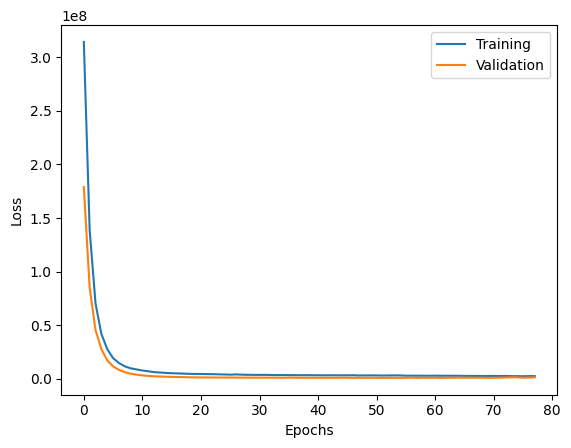

In [29]:
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

## Task d_ Hyperparameter tuning

### Add new layer

In [30]:
model = Sequential()
model.add(Dense(units = 64, input_dim = (26), activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(units = 64, activation = "relu"))
model.add(Dense(units = 64, activation = "relu"))
model.add(Dense(units = 1, activation = "linear"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                1728      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(optimizer="adam", loss='mean_squared_error', metrics='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience = 20)

history = model.fit(x = x_train_scaled, 
                    y = y_train,
                    batch_size = None, 
                    epochs = 200,
                    verbose = "auto", 
                    validation_split = 0.1,
                    callbacks = [early_stopping])

Epoch 1/200
1125/1125 [==============================] - 1s 820us/step - loss: 164187392.0000 - mean_squared_error: 164187392.0000 - val_loss: 31139352.0000 - val_mean_squared_error: 31139352.0000
Epoch 2/200
1125/1125 [==============================] - 1s 781us/step - loss: 21430274.0000 - mean_squared_error: 21430274.0000 - val_loss: 8046443.5000 - val_mean_squared_error: 8046443.5000
Epoch 3/200
1125/1125 [==============================] - 1s 781us/step - loss: 9987171.0000 - mean_squared_error: 9987171.0000 - val_loss: 3584393.5000 - val_mean_squared_error: 3584393.5000
Epoch 4/200
1125/1125 [==============================] - 1s 790us/step - loss: 6667207.0000 - mean_squared_error: 6667207.0000 - val_loss: 2191421.5000 - val_mean_squared_error: 2191421.5000
Epoch 5/200
1125/1125 [==============================] - 1s 798us/step - loss: 5363233.0000 - mean_squared_error: 5363233.0000 - val_loss: 1656984.3750 - val_mean_squared_error: 1656984.3750
Epoch 6/200
1125/1125 [==============

1125/1125 [==============================] - 1s 776us/step - loss: 2677728.2500 - mean_squared_error: 2677728.2500 - val_loss: 439186.3125 - val_mean_squared_error: 439186.3125
Epoch 45/200
1125/1125 [==============================] - 1s 770us/step - loss: 2625375.0000 - mean_squared_error: 2625375.0000 - val_loss: 407010.3125 - val_mean_squared_error: 407010.3125
Epoch 46/200
1125/1125 [==============================] - 1s 770us/step - loss: 2657247.7500 - mean_squared_error: 2657247.7500 - val_loss: 376059.1562 - val_mean_squared_error: 376059.1562
Epoch 47/200
1125/1125 [==============================] - 1s 775us/step - loss: 2513320.5000 - mean_squared_error: 2513320.5000 - val_loss: 366886.1562 - val_mean_squared_error: 366886.1562
Epoch 48/200
1125/1125 [==============================] - 1s 767us/step - loss: 2512648.7500 - mean_squared_error: 2512648.7500 - val_loss: 539413.1250 - val_mean_squared_error: 539413.1250
Epoch 49/200
1125/1125 [==============================] - 1s 76

313/313 [==============================] - 0s 554us/step


Text(0, 0.5, 'Predicted Price (Pound Sterling (GBP))')

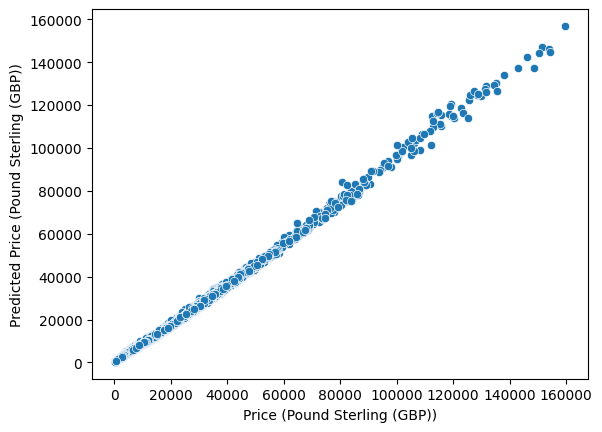

In [32]:
# predict the model
y_pred = model.predict(x_test_scaled)
y_pred = y_pred.reshape(len(y_pred),)

sns.scatterplot(x = y_test, y = y_pred)
plt.xlabel('Price (Pound Sterling (GBP))')
plt.ylabel('Predicted Price (Pound Sterling (GBP))')

In [33]:
model.evaluate(x_test_scaled, y_test, return_dict=True)
history_df = pd.DataFrame(history.history)
history_df

313/313 [==============================] - 0s 603us/step - loss: 3933559.5000 - mean_squared_error: 3933559.5000


,loss,mean_squared_error,val_loss,val_mean_squared_error
0,1.641874e+08,1.641874e+08,3.113935e+07,3.113935e+07
1,2.143027e+07,2.143027e+07,8.046444e+06,8.046444e+06
2,9.987171e+06,9.987171e+06,3.584394e+06,3.584394e+06
3,6.667207e+06,6.667207e+06,2.191422e+06,2.191422e+06
4,5.363233e+06,5.363233e+06,1.656984e+06,1.656984e+06
...,...,...,...,...
68,1.670726e+06,1.670726e+06,4.178279e+06,4.178279e+06
69,1.728198e+06,1.728198e+06,2.847132e+06,2.847132e+06
70,1.596825e+06,1.596825e+06,3.549391e+06,3.549391e+06
71,1.546936e+06,1.546936e+06,2.848311e+06,2.848311e+06


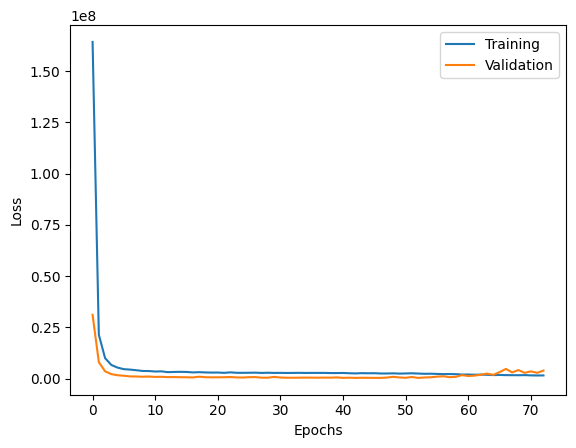

In [34]:
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### Change Adam learning rate to 0.01

In [35]:
# Compiling

# create an instance of Adam Optimizer with 0.01 learning rate
adam_optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=adam_optimizer, loss='mean_squared_error', metrics='mean_squared_error')

In [36]:
# Training

history = model.fit(x = x_train_scaled, 
                    y = y_train,
                    batch_size = None, 
                    epochs = 200,
                    verbose = "auto", 
                    validation_split = 0.1,
                    callbacks = [early_stopping])

Epoch 1/200
1125/1125 [==============================] - 1s 837us/step - loss: 3144338.0000 - mean_squared_error: 3144338.0000 - val_loss: 11707720.0000 - val_mean_squared_error: 11707720.0000
Epoch 2/200
1125/1125 [==============================] - 1s 819us/step - loss: 3146725.5000 - mean_squared_error: 3146725.5000 - val_loss: 3454916.7500 - val_mean_squared_error: 3454916.7500
Epoch 3/200
1125/1125 [==============================] - 1s 800us/step - loss: 3055439.2500 - mean_squared_error: 3055439.2500 - val_loss: 4465278.5000 - val_mean_squared_error: 4465278.5000
Epoch 4/200
1125/1125 [==============================] - 1s 790us/step - loss: 2725968.2500 - mean_squared_error: 2725968.2500 - val_loss: 6482907.0000 - val_mean_squared_error: 6482907.0000
Epoch 5/200
1125/1125 [==============================] - 1s 789us/step - loss: 2533146.5000 - mean_squared_error: 2533146.5000 - val_loss: 5350714.5000 - val_mean_squared_error: 5350714.5000
Epoch 6/200
1125/1125 [====================

1125/1125 [==============================] - 1s 787us/step - loss: 1395071.2500 - mean_squared_error: 1395071.2500 - val_loss: 12733192.0000 - val_mean_squared_error: 12733192.0000
Epoch 44/200
1125/1125 [==============================] - 1s 782us/step - loss: 1273774.0000 - mean_squared_error: 1273774.0000 - val_loss: 12393485.0000 - val_mean_squared_error: 12393485.0000


313/313 [==============================] - 0s 507us/step


Text(0, 0.5, 'Predicted Price (Pound Sterling (GBP))')

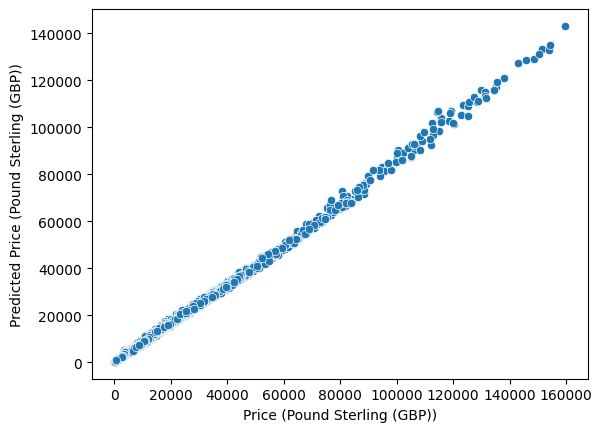

In [37]:
# predict the model
y_pred = model.predict(x_test_scaled)
y_pred = y_pred.reshape(len(y_pred),)

sns.scatterplot(x = y_test, y = y_pred)
plt.xlabel('Price (Pound Sterling (GBP))')
plt.ylabel('Predicted Price (Pound Sterling (GBP))')

In [38]:
model.evaluate(x_test_scaled, y_test, return_dict=True)
history_df = pd.DataFrame(history.history)
history_df

313/313 [==============================] - 0s 627us/step - loss: 12543563.0000 - mean_squared_error: 12543563.0000


,loss,mean_squared_error,val_loss,val_mean_squared_error
0,3144338.000,3144338.000,11707720.00,11707720.00
1,3146725.500,3146725.500,3454916.75,3454916.75
2,3055439.250,3055439.250,4465278.50,4465278.50
3,2725968.250,2725968.250,6482907.00,6482907.00
4,2533146.500,2533146.500,5350714.50,5350714.50
5,2819008.750,2819008.750,5744926.50,5744926.50
6,2526041.500,2526041.500,3537173.50,3537173.50
7,2523551.750,2523551.750,4139758.50,4139758.50
8,2765226.000,2765226.000,7806781.00,7806781.00
9,2521430.250,2521430.250,7099246.50,7099246.50


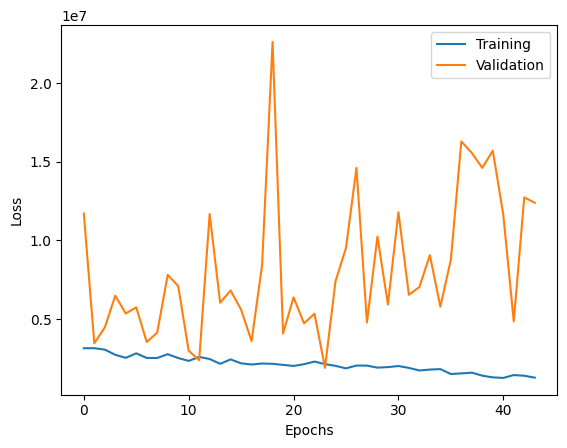

In [39]:
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### Change Adam learning rate to 0.0001

In [40]:
# Compiling

# create an instance of Adam Optimizer with 0.01 learning rate
adam_optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=adam_optimizer, loss='mean_squared_error', metrics='mean_squared_error')

In [41]:
# Training

history = model.fit(x = x_train_scaled, 
                    y = y_train,
                    batch_size = None, 
                    epochs = 200,
                    verbose = "auto", 
                    validation_split = 0.1,
                    callbacks = [early_stopping])

Epoch 1/200
1125/1125 [==============================] - 1s 827us/step - loss: 1274090.5000 - mean_squared_error: 1274090.5000 - val_loss: 11642156.0000 - val_mean_squared_error: 11642156.0000
Epoch 2/200
1125/1125 [==============================] - 1s 780us/step - loss: 1238585.2500 - mean_squared_error: 1238585.2500 - val_loss: 9152051.0000 - val_mean_squared_error: 9152051.0000
Epoch 3/200
1125/1125 [==============================] - 1s 777us/step - loss: 1256162.7500 - mean_squared_error: 1256162.7500 - val_loss: 9320973.0000 - val_mean_squared_error: 9320973.0000
Epoch 4/200
1125/1125 [==============================] - 1s 780us/step - loss: 1130270.1250 - mean_squared_error: 1130270.1250 - val_loss: 12286614.0000 - val_mean_squared_error: 12286614.0000
Epoch 5/200
1125/1125 [==============================] - 1s 812us/step - loss: 1110621.7500 - mean_squared_error: 1110621.7500 - val_loss: 9526908.0000 - val_mean_squared_error: 9526908.0000
Epoch 6/200
1125/1125 [==================

313/313 [==============================] - 0s 541us/step


Text(0, 0.5, 'Predicted Price (Pound Sterling (GBP))')

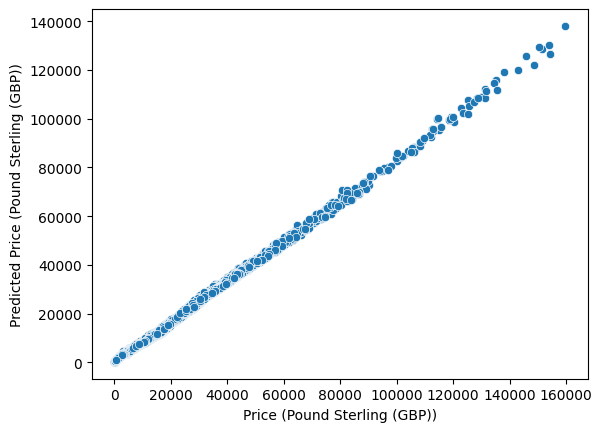

In [42]:
# predict the model
y_pred = model.predict(x_test_scaled)
y_pred = y_pred.reshape(len(y_pred),)

sns.scatterplot(x = y_test, y = y_pred)
plt.xlabel('Price (Pound Sterling (GBP))')
plt.ylabel('Predicted Price (Pound Sterling (GBP))')

In [43]:
model.evaluate(x_test_scaled, y_test, return_dict=True)
history_df = pd.DataFrame(history.history)
history_df

313/313 [==============================] - 0s 621us/step - loss: 14127156.0000 - mean_squared_error: 14127156.0000


,loss,mean_squared_error,val_loss,val_mean_squared_error
0,1.274090e+06,1.274090e+06,11642156.0,11642156.0
1,1.238585e+06,1.238585e+06,9152051.0,9152051.0
2,1.256163e+06,1.256163e+06,9320973.0,9320973.0
3,1.130270e+06,1.130270e+06,12286614.0,12286614.0
4,1.110622e+06,1.110622e+06,9526908.0,9526908.0
5,1.195298e+06,1.195298e+06,7303744.0,7303744.0
6,1.089142e+06,1.089142e+06,9298980.0,9298980.0
7,1.093950e+06,1.093950e+06,13425703.0,13425703.0
8,1.140374e+06,1.140374e+06,11069084.0,11069084.0
9,9.665854e+05,9.665854e+05,10715112.0,10715112.0


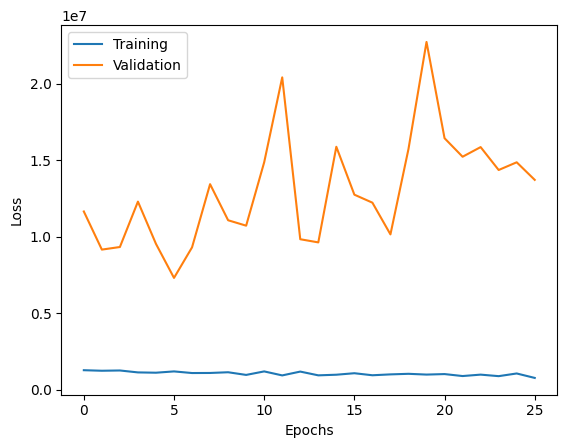

In [44]:
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Task e

In [ ]:
# It is wriiten in the report of this assignment

# Task f

In [ ]:
#Randomly initialize K cluster centroids in the feature space

#for k in range(1, n):
#    calculate the distance to each centroid
#    Assign each data point to the cluster whose centroid is the closest
#    Recalculate the centroid of each cluster by taking the mean of all data points 

#### Engine size & Price (K-means)

Text(0, 0.5, 'SSE')

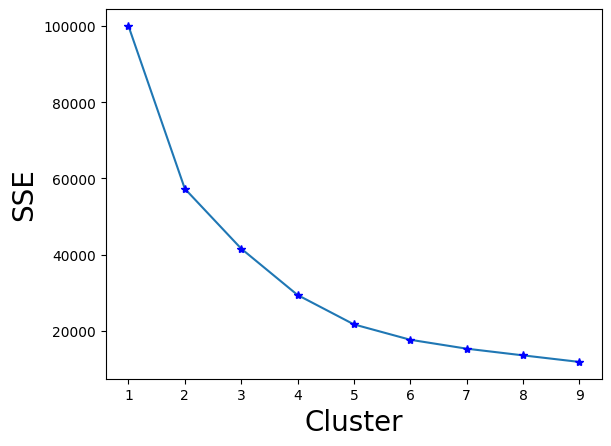

In [63]:
df = pd.read_csv('car_sales_data.csv')
feature_names = ["Engine size", "Price"] # defining a list of features
x = df[feature_names] # extracting the features

scale = StandardScaler() # Create an instance
scale.fit(x) # Training phase
x_scaled = scale.transform(x)

SSE = [] # is the distance of the points from the cluster center
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(x_scaled)
    intertia = kmeans.inertia_
    SSE.append(intertia)
    
# plotting the number of clusters
plot_df = pd.DataFrame({'Cluster' : range(1, 10), 'SSE' : SSE})
plot_df

plt.plot(plot_df['Cluster'], plot_df['SSE'])
plt.plot('Cluster', 'SSE', 'b*', data = plot_df)
plt.xlabel('Cluster', fontsize=20)
plt.ylabel('SSE', fontsize = 20)

In [64]:
# fitting based on the number of k
k = 2
kmeans = KMeans(n_clusters = k, random_state = 42)
kmeans.fit(x_scaled)
cluster_labels_pred = kmeans.predict(x_scaled)

# evaluation of the clustering
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)
s_score = silhouette_score(x_scaled, cluster_labels_pred)
print(f"davies_bouldin_score = {db_score:.2f} and silhouette_score = {s_score:.2f}")

davies_bouldin_score = 0.94 and silhouette_score = 0.62


[Text(0.5, 0, 'Pound (Sterling (GBP)'),
 Text(0, 0.5, 'Engine size (Litres)'),
 Text(0.5, 1.0, 'K-means Engine size vs. Price')]

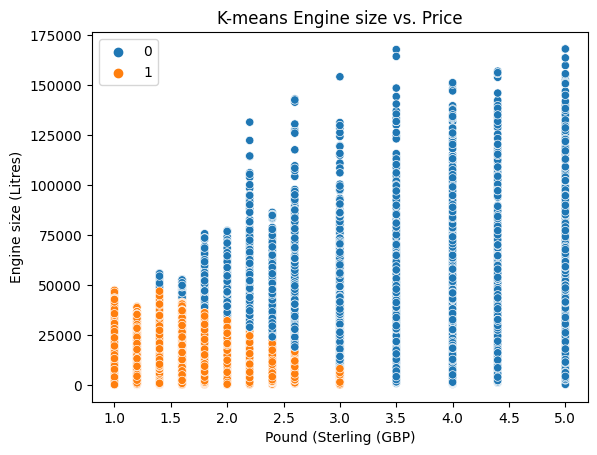

In [65]:
plt_kmeans_1 = sns.scatterplot(data = x, x = 'Engine size', y = 'Price', hue = cluster_labels_pred)
plt_kmeans_1.set(xlabel ="Pound (Sterling (GBP)", ylabel = "Engine size (Litres)", title ='K-means Engine size vs. Price')

In [96]:
# fitting based on the number of k
k = 3
kmeans = KMeans(n_clusters = k, random_state = 42)
kmeans.fit(x_scaled)
cluster_labels_pred = kmeans.predict(x_scaled)

# evaluation of the clustering
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)
s_score = silhouette_score(x_scaled, cluster_labels_pred)
print(f"davies_bouldin_score = {db_score:.2f} and silhouette_score = {s_score:.2f}")

davies_bouldin_score = 0.96 and silhouette_score = 0.41


[Text(0.5, 0, 'Pound (Sterling (GBP)'),
 Text(0, 0.5, 'Engine size (Litres)'),
 Text(0.5, 1.0, 'K-means Engine size vs. Price')]

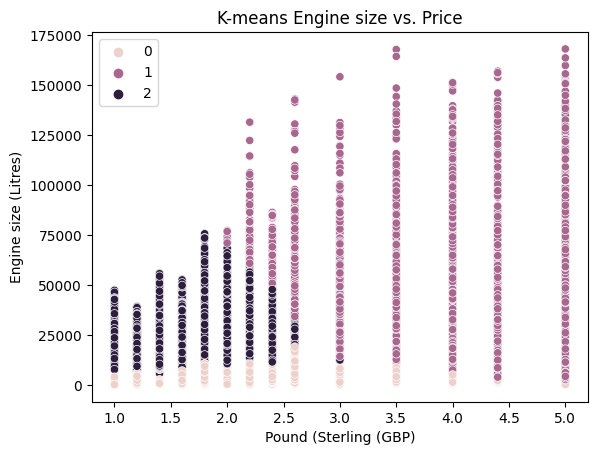

In [97]:
plt_kmeans_2 = sns.scatterplot(data = x, x = 'Engine size', y = 'Price', hue = cluster_labels_pred)
plt_kmeans_2.set(xlabel ="Pound (Sterling (GBP)", ylabel = "Engine size (Litres)", title ='K-means Engine size vs. Price')

In [98]:
# fitting based on the number of k
k = 4
kmeans = KMeans(n_clusters = k, random_state = 42)
kmeans.fit(x_scaled)
cluster_labels_pred = kmeans.predict(x_scaled)

# evaluation of the clustering
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)
s_score = silhouette_score(x_scaled, cluster_labels_pred)
print(f"davies_bouldin_score = {db_score:.2f} and silhouette_score = {s_score:.2f}")

davies_bouldin_score = 0.99 and silhouette_score = 0.33


[Text(0.5, 0, 'Pound (Sterling (GBP)'),
 Text(0, 0.5, 'Engine size (Litres)'),
 Text(0.5, 1.0, 'K-means Engine size vs. Price')]

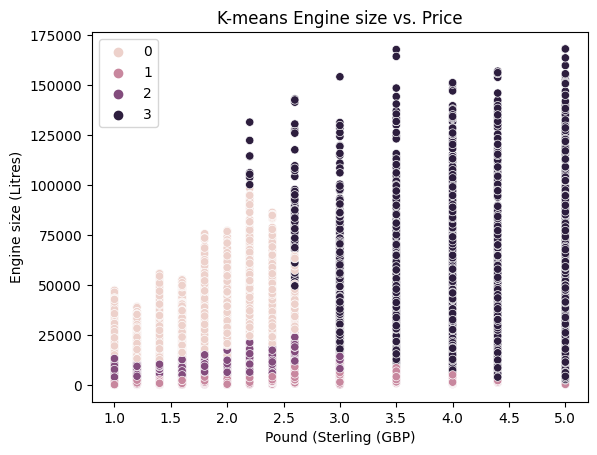

In [99]:
plt_kmeans_3 = sns.scatterplot(data = x, x = 'Engine size', y = 'Price', hue = cluster_labels_pred)
plt_kmeans_3.set(xlabel ="Pound (Sterling (GBP)", ylabel = "Engine size (Litres)", title ='K-means Engine size vs. Price')

#### Task g: Use Hierarchical Clustering

In [48]:
#Engine size & Price (K-means)
#	k = 2: davies_bouldin_score = 0.94 and silhouette_score = 0.62 **
#	k = 3: davies_bouldin_score = 0.90 and silhouette_score = 0.47
#	k = 4: davies_bouldin_score = 0.76 and silhouette_score = 0.49 

k = 2

agg_model = AgglomerativeClustering(n_clusters=k, linkage='complete')
agg_model.fit(x_scaled)
agg_label_predict = agg_model.fit_predict(x_scaled)
agg_label_predict

db_score = davies_bouldin_score(x_scaled, agg_label_predict)
s_score = silhouette_score(x_scaled, agg_label_predict)
print(f"davies_bouldin_score = {db_score:.2f} and silhouette_score = {s_score:.2f}")

davies_bouldin_score = 0.28 and silhouette_score = 0.80


#### Year of manufacture & Price

Text(0, 0.5, 'SSE')

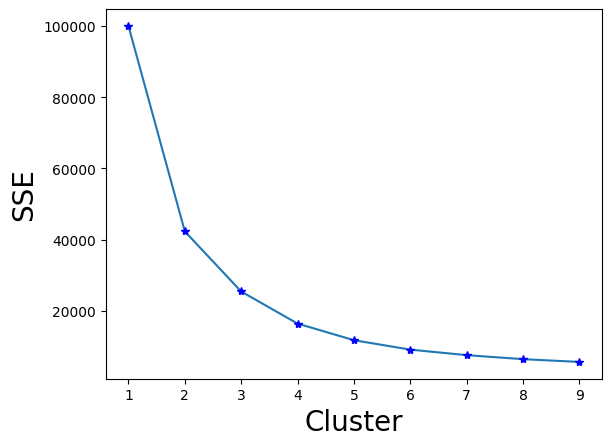

In [67]:
df = pd.read_csv('car_sales_data.csv')
feature_names = ["Year of manufacture", "Price"] # defining a list of features
x = df[feature_names] # extracting the features

scale = StandardScaler() # Create an instance
scale.fit(x) # Training phase
x_scaled = scale.transform(x)

SSE = [] # is the distance of the points from the cluster center
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(x_scaled)
    intertia = kmeans.inertia_
    SSE.append(intertia)
    
# plotting the number of clusters
plot_df = pd.DataFrame({'Cluster' : range(1, 10), 'SSE' : SSE})
plot_df

plt.plot(plot_df['Cluster'], plot_df['SSE'])
plt.plot('Cluster', 'SSE', 'b*', data = plot_df)
plt.xlabel('Cluster', fontsize=20)
plt.ylabel('SSE', fontsize = 20)

In [68]:
# fitting based on the number of k
k = 2
kmeans = KMeans(n_clusters = k, random_state = 42)
kmeans.fit(x_scaled)
cluster_labels_pred = kmeans.predict(x_scaled)

# evaluation of the clustering
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)
s_score = silhouette_score(x_scaled, cluster_labels_pred)
print(f"davies_bouldin_score = {db_score:.2f} and silhouette_score = {s_score:.2f}")

davies_bouldin_score = 0.68 and silhouette_score = 0.55


[Text(0.5, 0, 'Pound (Sterling (GBP)'),
 Text(0, 0.5, 'Year of manufacture'),
 Text(0.5, 1.0, 'K-means Engine size vs. Price')]

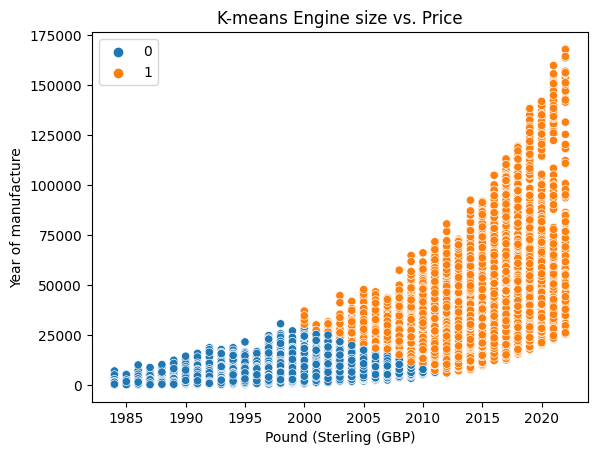

In [69]:
plt_kmeans_4 = sns.scatterplot(data = x, x = 'Year of manufacture', y = 'Price', hue = cluster_labels_pred)
plt_kmeans_4.set(xlabel ="Pound (Sterling (GBP)", ylabel = "Year of manufacture", title ='K-means Engine size vs. Price')

In [100]:
# fitting based on the number of k
k = 3
kmeans = KMeans(n_clusters = k, random_state = 42)
kmeans.fit(x_scaled)
cluster_labels_pred = kmeans.predict(x_scaled)

# evaluation of the clustering
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)
s_score = silhouette_score(x_scaled, cluster_labels_pred)
print(f"davies_bouldin_score = {db_score:.2f} and silhouette_score = {s_score:.2f}")

davies_bouldin_score = 0.96 and silhouette_score = 0.41


[Text(0.5, 0, 'Pound (Sterling (GBP)'),
 Text(0, 0.5, 'Year of manufacture'),
 Text(0.5, 1.0, 'K-means Year of manufacture vs. Price')]

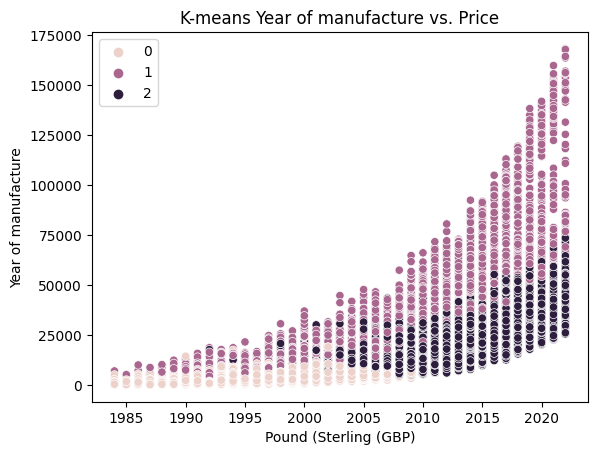

In [101]:
plt_kmeans_5 = sns.scatterplot(data = x, x = 'Year of manufacture', y = 'Price', hue = cluster_labels_pred)
plt_kmeans_5.set(xlabel ="Pound (Sterling (GBP)", ylabel = "Year of manufacture", title ='K-means Year of manufacture vs. Price')

In [102]:
# fitting based on the number of k
k = 4
kmeans = KMeans(n_clusters = k, random_state = 42)
kmeans.fit(x_scaled)
cluster_labels_pred = kmeans.predict(x_scaled)

# evaluation of the clustering
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)
s_score = silhouette_score(x_scaled, cluster_labels_pred)
print(f"davies_bouldin_score = {db_score:.2f} and silhouette_score = {s_score:.2f}")

davies_bouldin_score = 0.99 and silhouette_score = 0.33


[Text(0.5, 0, 'Pound (Sterling (GBP)'),
 Text(0, 0.5, 'Year of manufacture'),
 Text(0.5, 1.0, 'K-means Year of manufacture vs. Price')]

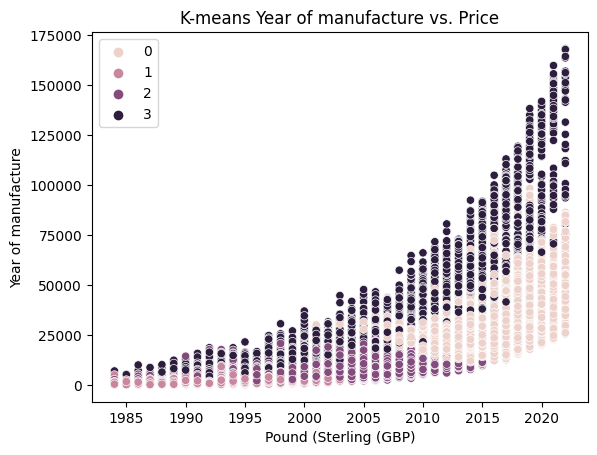

In [103]:
plt_kmeans_6 = sns.scatterplot(data = x, x = 'Year of manufacture', y = 'Price', hue = cluster_labels_pred)
plt_kmeans_6.set(xlabel ="Pound (Sterling (GBP)", ylabel = "Year of manufacture", title ='K-means Year of manufacture vs. Price')

#### Task g: Use Hierarchical Clustering

In [70]:
#Year of manufacture & Price
#	k = 2: davies_bouldin_score = 0.68 and silhouette_score = 0.55 **
#	k = 3: davies_bouldin_score = 0.69 and silhouette_score = 0.51
#	k = 4: davies_bouldin_score = 0.64 and silhouette_score = 0.50 

k = 2

agg_model = AgglomerativeClustering(n_clusters=k, linkage='complete')
agg_model.fit(x_scaled)
agg_label_predict = agg_model.fit_predict(x_scaled)
agg_label_predict

db_score = davies_bouldin_score(x_scaled, agg_label_predict)
s_score = silhouette_score(x_scaled, agg_label_predict)
print(f"davies_bouldin_score = {db_score:.2f} and silhouette_score = {s_score:.2f}")

davies_bouldin_score = 0.44 and silhouette_score = 0.69


#### Mileage & Price

Text(0, 0.5, 'SSE')

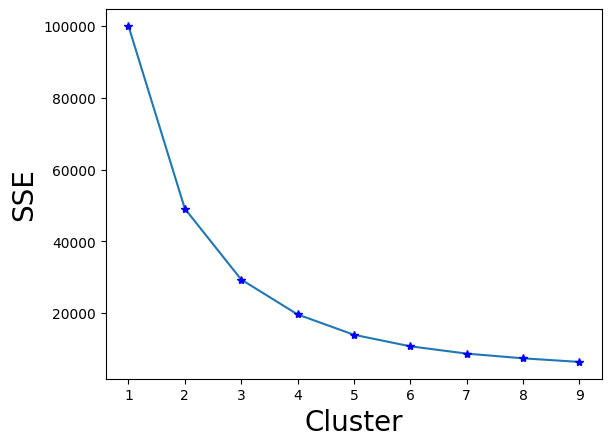

In [71]:
df = pd.read_csv('car_sales_data.csv')
feature_names = ["Mileage", "Price"] # defining a list of features
x = df[feature_names] # extracting the features

scale = StandardScaler() # Create an instance
scale.fit(x) # Training phase
x_scaled = scale.transform(x)

SSE = [] # is the distance of the points from the cluster center
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(x_scaled)
    intertia = kmeans.inertia_
    SSE.append(intertia)
    
# plotting the number of clusters
plot_df = pd.DataFrame({'Cluster' : range(1, 10), 'SSE' : SSE})
plot_df

plt.plot(plot_df['Cluster'], plot_df['SSE'])
plt.plot('Cluster', 'SSE', 'b*', data = plot_df)
plt.xlabel('Cluster', fontsize=20)
plt.ylabel('SSE', fontsize = 20)

In [72]:
# fitting based on the number of k
k = 2
kmeans = KMeans(n_clusters = k, random_state = 42)
kmeans.fit(x_scaled)
cluster_labels_pred = kmeans.predict(x_scaled)

# evaluation of the clustering
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)
s_score = silhouette_score(x_scaled, cluster_labels_pred)
print(f"davies_bouldin_score = {db_score:.2f} and silhouette_score = {s_score:.2f}")

davies_bouldin_score = 0.76 and silhouette_score = 0.49


[Text(0.5, 0, 'Pound (Sterling (GBP)'),
 Text(0, 0.5, 'Mileage'),
 Text(0.5, 1.0, 'K-means Mileage vs. Price')]

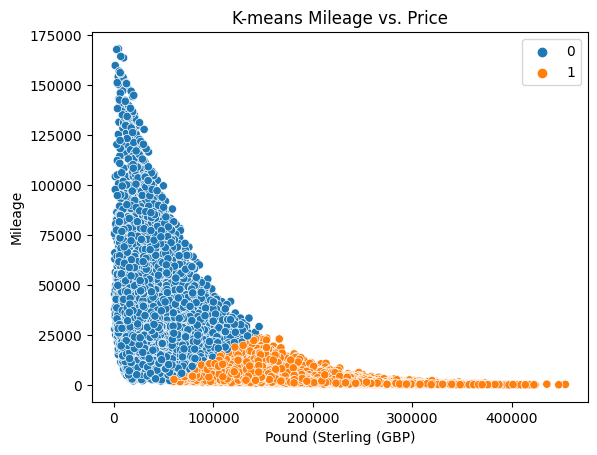

In [73]:
plt_kmeans_7 = sns.scatterplot(data = x, x = 'Mileage', y = 'Price', hue = cluster_labels_pred)
plt_kmeans_7.set(xlabel ="Pound (Sterling (GBP)", ylabel = "Mileage", title ='K-means Mileage vs. Price')

In [104]:
# fitting based on the number of k
k = 3
kmeans = KMeans(n_clusters = k, random_state = 42)
kmeans.fit(x_scaled)
cluster_labels_pred = kmeans.predict(x_scaled)

# evaluation of the clustering
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)
s_score = silhouette_score(x_scaled, cluster_labels_pred)
print(f"davies_bouldin_score = {db_score:.2f} and silhouette_score = {s_score:.2f}")

davies_bouldin_score = 0.96 and silhouette_score = 0.41


[Text(0.5, 0, 'Pound (Sterling (GBP)'),
 Text(0, 0.5, 'Mileage'),
 Text(0.5, 1.0, 'K-means Mileage vs. Price')]

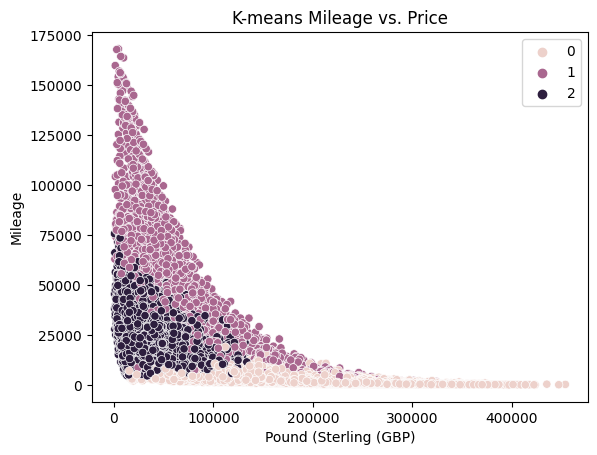

In [105]:
plt_kmeans_8 = sns.scatterplot(data = x, x = 'Mileage', y = 'Price', hue = cluster_labels_pred)
plt_kmeans_8.set(xlabel ="Pound (Sterling (GBP)", ylabel = "Mileage", title ='K-means Mileage vs. Price')

In [106]:
# fitting based on the number of k
k = 4
kmeans = KMeans(n_clusters = k, random_state = 42)
kmeans.fit(x_scaled)
cluster_labels_pred = kmeans.predict(x_scaled)

# evaluation of the clustering
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)
s_score = silhouette_score(x_scaled, cluster_labels_pred)
print(f"davies_bouldin_score = {db_score:.2f} and silhouette_score = {s_score:.2f}")

davies_bouldin_score = 0.99 and silhouette_score = 0.33


[Text(0.5, 0, 'Pound (Sterling (GBP)'),
 Text(0, 0.5, 'Mileage'),
 Text(0.5, 1.0, 'K-means Mileage vs. Price')]

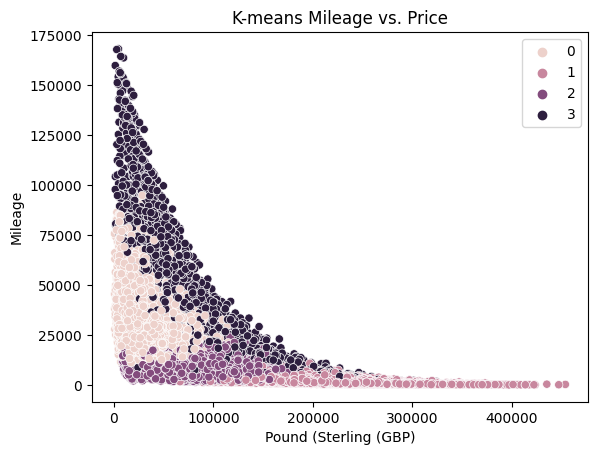

In [107]:
plt_kmeans_9 = sns.scatterplot(data = x, x = 'Mileage', y = 'Price', hue = cluster_labels_pred)
plt_kmeans_9.set(xlabel ="Pound (Sterling (GBP)", ylabel = "Mileage", title ='K-means Mileage vs. Price')

#### Task g: Use Hierarchical Clustering

In [74]:
#Mileage & Price
#	k = 2: davies_bouldin_score = 0.76 and silhouette_score = 0.49
#	k = 3: davies_bouldin_score = 0.69 and silhouette_score = 0.48 **
#	k = 4: davies_bouldin_score = 0.66 and silhouette_score = 0.47 

k = 2

agg_model = AgglomerativeClustering(n_clusters=k, linkage='complete')
agg_model.fit(x_scaled)
agg_label_predict = agg_model.fit_predict(x_scaled)
agg_label_predict

db_score = davies_bouldin_score(x_scaled, agg_label_predict)
s_score = silhouette_score(x_scaled, agg_label_predict)
print(f"davies_bouldin_score = {db_score:.2f} and silhouette_score = {s_score:.2f}")

davies_bouldin_score = 0.41 and silhouette_score = 0.71


#### Engine size & Year of manufacture & Price

Text(0, 0.5, 'SSE')

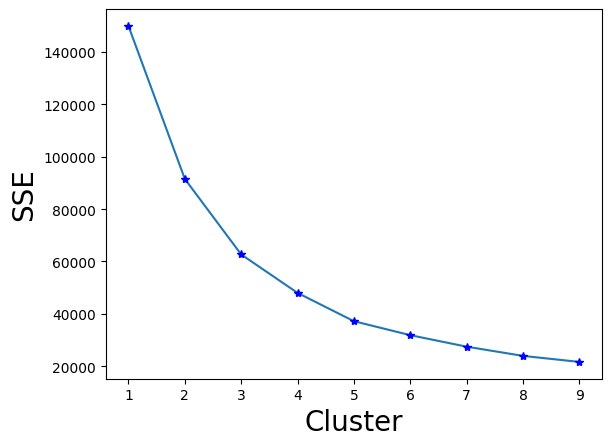

In [75]:
df = pd.read_csv('car_sales_data.csv')
feature_names = ["Engine size", "Year of manufacture", "Price"] # defining a list of features
x = df[feature_names] # extracting the features

scale = StandardScaler() # Create an instance
scale.fit(x) # Training phase
x_scaled = scale.transform(x)

SSE = [] # is the distance of the points from the cluster center
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(x_scaled)
    intertia = kmeans.inertia_
    SSE.append(intertia)
    
# plotting the number of clusters
plot_df = pd.DataFrame({'Cluster' : range(1, 10), 'SSE' : SSE})
plot_df

plt.plot(plot_df['Cluster'], plot_df['SSE'])
plt.plot('Cluster', 'SSE', 'b*', data = plot_df)
plt.xlabel('Cluster', fontsize=20)
plt.ylabel('SSE', fontsize = 20)

In [77]:
# fitting based on the number of k
k = 3
kmeans = KMeans(n_clusters = k, random_state = 42)
kmeans.fit(x_scaled)
cluster_labels_pred = kmeans.predict(x_scaled)

# evaluation of the clustering
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)
s_score = silhouette_score(x_scaled, cluster_labels_pred)
print(f"davies_bouldin_score = {db_score:.2f} and silhouette_score = {s_score:.2f}")

davies_bouldin_score = 0.91 and silhouette_score = 0.44


In [78]:
# fitting based on the number of k
k = 4
kmeans = KMeans(n_clusters = k, random_state = 42)
kmeans.fit(x_scaled)
cluster_labels_pred = kmeans.predict(x_scaled)

# evaluation of the clustering
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)
s_score = silhouette_score(x_scaled, cluster_labels_pred)
print(f"davies_bouldin_score = {db_score:.2f} and silhouette_score = {s_score:.2f}")

davies_bouldin_score = 0.81 and silhouette_score = 0.44


#### Task g: Use Hierarchical Clustering

In [79]:
#Engine size & Year of manufacture & Price
#	k = 3: davies_bouldin_score = 0.91 and silhouette_score = 0.44
#	k = 4: davies_bouldin_score = 0.81 and silhouette_score = 0.44 **

k = 4

agg_model = AgglomerativeClustering(n_clusters=k, linkage='complete')
agg_model.fit(x_scaled)
agg_label_predict = agg_model.fit_predict(x_scaled)
agg_label_predict

db_score = davies_bouldin_score(x_scaled, agg_label_predict)
s_score = silhouette_score(x_scaled, agg_label_predict)
print(f"davies_bouldin_score = {db_score:.2f} and silhouette_score = {s_score:.2f}")

davies_bouldin_score = 0.78 and silhouette_score = 0.39


#### Engine size & Mileage & Price

Text(0, 0.5, 'SSE')

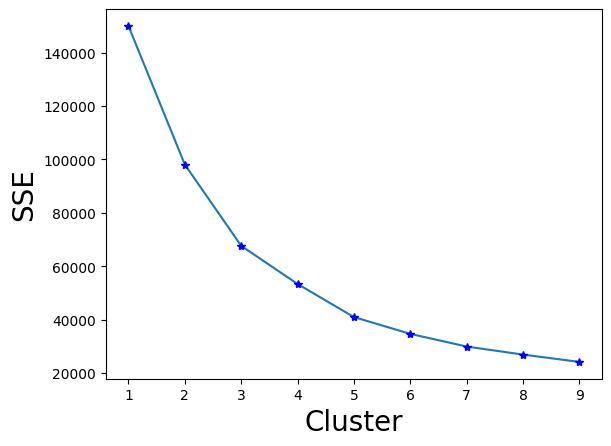

In [80]:
df = pd.read_csv('car_sales_data.csv')
feature_names = ["Engine size", "Mileage", "Price"] # defining a list of features
x = df[feature_names] # extracting the features

scale = StandardScaler() # Create an instance
scale.fit(x) # Training phase
x_scaled = scale.transform(x)

SSE = [] # is the distance of the points from the cluster center
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(x_scaled)
    intertia = kmeans.inertia_
    SSE.append(intertia)
    
# plotting the number of clusters
plot_df = pd.DataFrame({'Cluster' : range(1, 10), 'SSE' : SSE})
plot_df

plt.plot(plot_df['Cluster'], plot_df['SSE'])
plt.plot('Cluster', 'SSE', 'b*', data = plot_df)
plt.xlabel('Cluster', fontsize=20)
plt.ylabel('SSE', fontsize = 20)

In [81]:
# fitting based on the number of k
k = 3
kmeans = KMeans(n_clusters = k, random_state = 42)
kmeans.fit(x_scaled)
cluster_labels_pred = kmeans.predict(x_scaled)

# evaluation of the clustering
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)
s_score = silhouette_score(x_scaled, cluster_labels_pred)
print(f"davies_bouldin_score = {db_score:.2f} and silhouette_score = {s_score:.2f}")

davies_bouldin_score = 0.95 and silhouette_score = 0.38


In [82]:
# fitting based on the number of k
k = 4
kmeans = KMeans(n_clusters = k, random_state = 42)
kmeans.fit(x_scaled)
cluster_labels_pred = kmeans.predict(x_scaled)

# evaluation of the clustering
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)
s_score = silhouette_score(x_scaled, cluster_labels_pred)
print(f"davies_bouldin_score = {db_score:.2f} and silhouette_score = {s_score:.2f}")

davies_bouldin_score = 0.89 and silhouette_score = 0.39


#### Task g: Use Hierarchical Clustering

In [83]:
#Engine size & Year of Mileage & Price
#	k = 3: davies_bouldin_score = 0.95 and silhouette_score = 0.38
#	k = 4: davies_bouldin_score = 0.89 and silhouette_score = 0.39 **

k = 4

agg_model = AgglomerativeClustering(n_clusters=k, linkage='complete')
agg_model.fit(x_scaled)
agg_label_predict = agg_model.fit_predict(x_scaled)
agg_label_predict

db_score = davies_bouldin_score(x_scaled, agg_label_predict)
s_score = silhouette_score(x_scaled, agg_label_predict)
print(f"davies_bouldin_score = {db_score:.2f} and silhouette_score = {s_score:.2f}")

davies_bouldin_score = 0.95 and silhouette_score = 0.31


#### Year of manufacture & Mileage & Price

Text(0, 0.5, 'SSE')

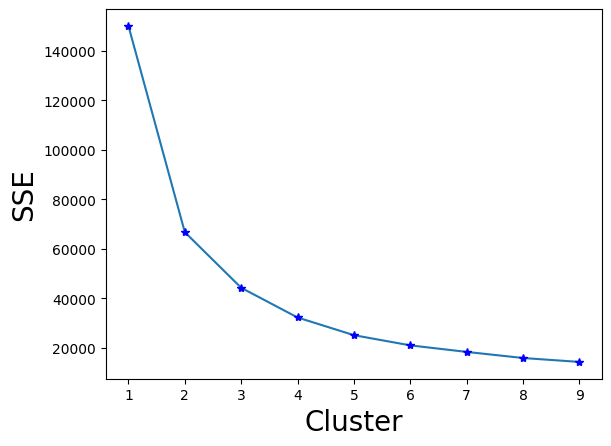

In [84]:
df = pd.read_csv('car_sales_data.csv')
feature_names = ["Year of manufacture", "Mileage", "Price"] # defining a list of features
x = df[feature_names] # extracting the features

scale = StandardScaler() # Create an instance
scale.fit(x) # Training phase
x_scaled = scale.transform(x)

SSE = [] # is the distance of the points from the cluster center
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(x_scaled)
    intertia = kmeans.inertia_
    SSE.append(intertia)
    
# plotting the number of clusters
plot_df = pd.DataFrame({'Cluster' : range(1, 10), 'SSE' : SSE})
plot_df

plt.plot(plot_df['Cluster'], plot_df['SSE'])
plt.plot('Cluster', 'SSE', 'b*', data = plot_df)
plt.xlabel('Cluster', fontsize=20)
plt.ylabel('SSE', fontsize = 20)

In [88]:
# fitting based on the number of k
k = 2
kmeans = KMeans(n_clusters = k, random_state = 42)
kmeans.fit(x_scaled)
cluster_labels_pred = kmeans.predict(x_scaled)

# evaluation of the clustering
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)
s_score = silhouette_score(x_scaled, cluster_labels_pred)
print(f"davies_bouldin_score = {db_score:.2f} and silhouette_score = {s_score:.2f}")

davies_bouldin_score = 0.75 and silhouette_score = 0.49


In [86]:
# fitting based on the number of k
k = 3
kmeans = KMeans(n_clusters = k, random_state = 42)
kmeans.fit(x_scaled)
cluster_labels_pred = kmeans.predict(x_scaled)

# evaluation of the clustering
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)
s_score = silhouette_score(x_scaled, cluster_labels_pred)
print(f"davies_bouldin_score = {db_score:.2f} and silhouette_score = {s_score:.2f}")

davies_bouldin_score = 0.79 and silhouette_score = 0.42


In [87]:
# fitting based on the number of k
k = 4
kmeans = KMeans(n_clusters = k, random_state = 42)
kmeans.fit(x_scaled)
cluster_labels_pred = kmeans.predict(x_scaled)

# evaluation of the clustering
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)
s_score = silhouette_score(x_scaled, cluster_labels_pred)
print(f"davies_bouldin_score = {db_score:.2f} and silhouette_score = {s_score:.2f}")

davies_bouldin_score = 0.77 and silhouette_score = 0.41


#### Task g: Use Hierarchical Clustering

In [89]:
#Year of manufacture & Mileage & Price
#	k = 2: davies_bouldin_score = 0.75 and silhouette_score = 0.49 **
#	k = 3: davies_bouldin_score = 0.79 and silhouette_score = 0.42
#	k = 4: davies_bouldin_score = 0.77 and silhouette_score = 0.41

k = 2

agg_model = AgglomerativeClustering(n_clusters=k, linkage='complete')
agg_model.fit(x_scaled)
agg_label_predict = agg_model.fit_predict(x_scaled)
agg_label_predict

db_score = davies_bouldin_score(x_scaled, agg_label_predict)
s_score = silhouette_score(x_scaled, agg_label_predict)
print(f"davies_bouldin_score = {db_score:.2f} and silhouette_score = {s_score:.2f}")

davies_bouldin_score = 0.51 and silhouette_score = 0.61


#### Engine size & Year of manufacture & Mileage & Price

Text(0, 0.5, 'SSE')

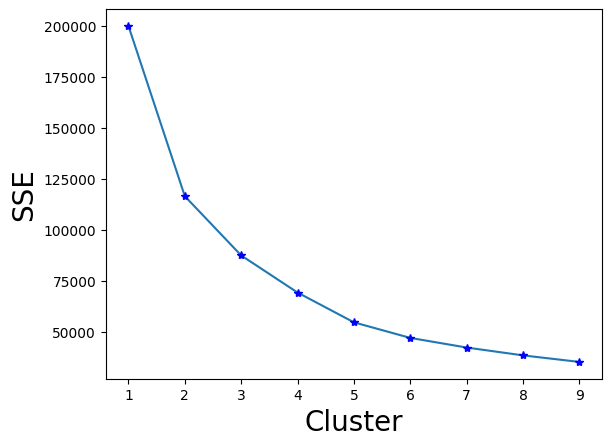

In [90]:
df = pd.read_csv('car_sales_data.csv')
feature_names = ["Engine size", "Year of manufacture", "Mileage", "Price"] # defining a list of features
x = df[feature_names] # extracting the features

scale = StandardScaler() # Create an instance
scale.fit(x) # Training phase
x_scaled = scale.transform(x)

SSE = [] # is the distance of the points from the cluster center
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(x_scaled)
    intertia = kmeans.inertia_
    SSE.append(intertia)
    
# plotting the number of clusters
plot_df = pd.DataFrame({'Cluster' : range(1, 10), 'SSE' : SSE})
plot_df

plt.plot(plot_df['Cluster'], plot_df['SSE'])
plt.plot('Cluster', 'SSE', 'b*', data = plot_df)
plt.xlabel('Cluster', fontsize=20)
plt.ylabel('SSE', fontsize = 20)

In [91]:
# fitting based on the number of k
k = 2
kmeans = KMeans(n_clusters = k, random_state = 42)
kmeans.fit(x_scaled)
cluster_labels_pred = kmeans.predict(x_scaled)

# evaluation of the clustering
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)
s_score = silhouette_score(x_scaled, cluster_labels_pred)
print(f"davies_bouldin_score = {db_score:.2f} and silhouette_score = {s_score:.2f}")

davies_bouldin_score = 0.98 and silhouette_score = 0.40


In [94]:
# fitting based on the number of k
k = 3
kmeans = KMeans(n_clusters = k, random_state = 42)
kmeans.fit(x_scaled)
cluster_labels_pred = kmeans.predict(x_scaled)

# evaluation of the clustering
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)
s_score = silhouette_score(x_scaled, cluster_labels_pred)
print(f"davies_bouldin_score = {db_score:.2f} and silhouette_score = {s_score:.2f}")

davies_bouldin_score = 0.96 and silhouette_score = 0.41


In [93]:
# fitting based on the number of k
k = 4
kmeans = KMeans(n_clusters = k, random_state = 42)
kmeans.fit(x_scaled)
cluster_labels_pred = kmeans.predict(x_scaled)

# evaluation of the clustering
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)
s_score = silhouette_score(x_scaled, cluster_labels_pred)
print(f"davies_bouldin_score = {db_score:.2f} and silhouette_score = {s_score:.2f}")

davies_bouldin_score = 0.99 and silhouette_score = 0.33


#### Task g: Use Hierarchical Clustering

In [95]:
#Engine size & Year of manufacture & Mileage & Price
#	k = 2: davies_bouldin_score = 0.98 and silhouette_score = 0.40
#	k = 3: davies_bouldin_score = 0.96 and silhouette_score = 0.41 **
#	k = 4: davies_bouldin_score = 0.99 and silhouette_score = 0.33

k = 3

agg_model = AgglomerativeClustering(n_clusters=k, linkage='complete')
agg_model.fit(x_scaled)
agg_label_predict = agg_model.fit_predict(x_scaled)
agg_label_predict

db_score = davies_bouldin_score(x_scaled, agg_label_predict)
s_score = silhouette_score(x_scaled, agg_label_predict)
print(f"davies_bouldin_score = {db_score:.2f} and silhouette_score = {s_score:.2f}")

davies_bouldin_score = 0.74 and silhouette_score = 0.29


#### Task g: Use Hierarchical Clustering

In [ ]:
# This task is done among the task f after selecting the best number of k

#### Task g: Use DBSCAN

#### Engine size & Price

In [108]:
df = pd.read_csv('car_sales_data.csv')
feature_names = ['Engine size', 'Price']
x = df[feature_names]

# Standardize the features (recommended for DBSCAN)
scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)

# Create and fit the DBSCAN model
dbscan = DBSCAN(eps=0.2, min_samples=3)
dbscan.fit(x_scaled)
dbscan_labels_pred = dbscan.fit_predict(x_scaled)

db_score = davies_bouldin_score(x_scaled, dbscan_labels_pred)
s_score = silhouette_score(x_scaled, dbscan_labels_pred)
print(f"davies_bouldin_score = {db_score:.2f} and silhouette_score = {s_score:.2f}")

davies_bouldin_score = 2.64 and silhouette_score = 0.06


[Text(0.5, 0, 'Pound (Sterling (GBP)'),
 Text(0, 0.5, 'Engine size (Litres)'),
 Text(0.5, 1.0, 'DBSCAN Engine size vs. Price')]

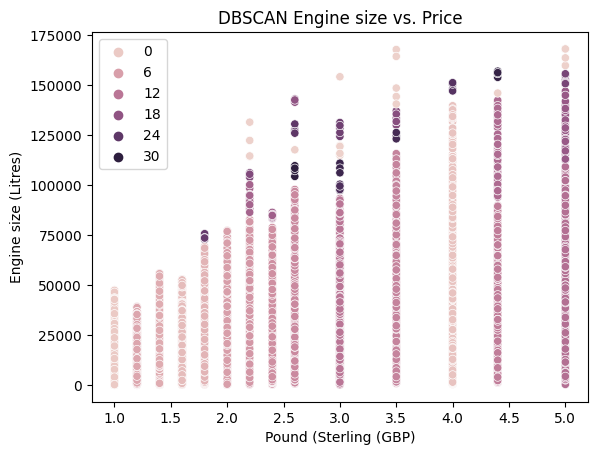

In [109]:
plt_DBSCAN_1 = sns.scatterplot(data = x, x = 'Engine size', y = 'Price', hue=dbscan_labels_pred)
plt_DBSCAN_1.set(xlabel ="Pound (Sterling (GBP)", ylabel = "Engine size (Litres)", title ='DBSCAN Engine size vs. Price')

# References

In [ ]:
# Task 1- C :
    # Random Forest Regression in Python (https://www.geeksforgeeks.org/random-forest-regression-in-python/)
    # Fit string list with LabelEncoder (https://stackoverflow.com/questions/38749305/labelencoder-order-of-fit-for-a-pandas-df#:~:text=Another%20approach%20would%20be%20changing%20the%20classes_%20attribute,%22second%22%2C%20%22third%22%2C%20%22fourth%22%5D%29%20le.transform%20%28%5B%22first%22%2C%20%22second%22%2C%20%22third%22%2C%20%22fourth%22%5D%29)
    # Use one-hot encoding (https://stackoverflow.com/questions/24715230/can-sklearn-random-forest-directly-handle-categorical-features)
    # Use concat in pandas (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)